# Decision Trees (Classification)
***
### Purpose:
This notebook will be an evolving investigation into decision tree algorithms, with a lot of focus on sickit learn's algorithm.

Decision tree's are simple greedy algorithms, easy to interptret and are a good base before getting into more complex modeling. Sickit Learn's algorith is based of the Classification and Regression Tree (CART) algorithm with some limitations.

### Benefits:
* Non-parametric
* Does not require feature scaling or centering

### Limitations:
* Some instability
* Orthogonal decision boundaries
* Sensitive to training set rotation
* They are very sensitive to small variations in the training data
* Stochastic
* Sickit Learn CART algorithm doesnt do pruning

### Evaluation Options:
* Confusion Matrix
* Precision, Recall, F-Score
* Receiver operating characteristic (ROC) curve
* Decision Tree decision boundaries
* A good way to evaluate a model is to use cross-validation

### Outline
1. Simple Model
2. Explore Parameters
2. Attributes and Methods
3. Scoring Methods
4. Optimization
    * Principle Component Analysis
    * Independent Component Analysis
    * Feature Selection
    * Grid Search
    * Cross-Validation
5. Final Evaluation

## To-Do
1. Complete scoring section
2. More details on the algorithm itself
3. Complete fine tuning examples
4. Complete an overall optimized model

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loan = pd.read_csv('data/loan_data.csv')

# Data Preperation

In [2]:
# Seperate out features and target
features = ['purpose']
final = pd.get_dummies(loan,columns=features,drop_first=True)
from sklearn.model_selection import train_test_split

# Split the data
X = final.drop('not.fully.paid',axis=1)
y = final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, 
                        y, test_size=0.30, random_state=123)

# Train the Model

In [3]:
# Using the onboard classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# Print out how the model perfomed
from sklearn.metrics import classification_report,confusion_matrix
predict = dtree.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[1996  398]
 [ 371  109]]
             precision    recall  f1-score   support

          0       0.84      0.83      0.84      2394
          1       0.21      0.23      0.22       480

avg / total       0.74      0.73      0.74      2874



### Takeaways:
* Without any changes, the model performed below any acceptable level
* Concerning to see the difference between the two classes in accuracy
* Many 'false' predictions
***

# Parameters

### Criterion: Gini vs Entropy

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset

$\textit{Gini}: \mathit{Gini}(E) = 1 - \sum_{j=1}^{c}p_j^2$

Entropy is used to decide which feature to split on at each step in building the tree.

$\textit{Entropy}: H(E) = -\sum_{j=1}^{c}p_j\log p_j$

I haven't seen a consensus on which to use but more favor is with Gini Impurity

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix

# Using Gini Impurity
from sklearn.tree import DecisionTreeClassifier
dtree_gini = DecisionTreeClassifier(criterion='gini')
dtree_gini.fit(X_train,y_train)

predict_gini = dtree_gini.predict(X_test)
print(confusion_matrix(y_test,predict_gini))
print(classification_report(y_test,predict_gini))
mean_squared_error(y_test,predict_gini)

[[2023  371]
 [ 365  115]]
             precision    recall  f1-score   support

          0       0.85      0.85      0.85      2394
          1       0.24      0.24      0.24       480

avg / total       0.75      0.74      0.74      2874



0.25608907446068196

In [5]:
# Using Entropy
dtree_entropy = DecisionTreeClassifier(criterion='entropy')
dtree_entropy.fit(X_train,y_train)

predict_entropy = dtree_entropy.predict(X_test)
print(confusion_matrix(y_test,predict_entropy))
print(classification_report(y_test,predict_entropy))
mean_squared_error(y_test,predict_entropy)

[[2020  374]
 [ 372  108]]
             precision    recall  f1-score   support

          0       0.84      0.84      0.84      2394
          1       0.22      0.23      0.22       480

avg / total       0.74      0.74      0.74      2874



0.25956854558107167

### Results:
* They performed similarly
* Entropy had lower MSE
* Performed similarly with the true positives
***

### Splitter - Best vs Random

* “Best” to choose the best split
* “Random” to choose the best random split

In [6]:
# Best
from sklearn.tree import DecisionTreeClassifier
dtree_best = DecisionTreeClassifier(splitter='best')
dtree_best.fit(X_train,y_train)

predict_best = dtree_best.predict(X_test)
print(confusion_matrix(y_test,predict_best))
print(classification_report(y_test,predict_best))
mean_squared_error(y_test,predict_best)

[[2005  389]
 [ 363  117]]
             precision    recall  f1-score   support

          0       0.85      0.84      0.84      2394
          1       0.23      0.24      0.24       480

avg / total       0.74      0.74      0.74      2874



0.26165622825330548

In [7]:
# Random
from sklearn.tree import DecisionTreeClassifier
dtree_random = DecisionTreeClassifier(splitter="random")
dtree_random.fit(X_train,y_train)

predict_random = dtree_random.predict(X_test)
print(confusion_matrix(y_test,predict_random))
print(classification_report(y_test,predict_random))
mean_squared_error(y_test,predict_random)

[[2000  394]
 [ 365  115]]
             precision    recall  f1-score   support

          0       0.85      0.84      0.84      2394
          1       0.23      0.24      0.23       480

avg / total       0.74      0.74      0.74      2874



0.26409185803757829

### Results:
* Random splitter had a higher MSE and lower accuracy
* I don't know the benefit of ever using a random splitter
***

### Max Depth

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

In [8]:
# Use a grid search to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [2, 4, 6, 8, 10, 12]},
  ]

# execute the grid search
dtree_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree_grid, param_grid,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_test, y_test)

# Score the grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.408674214722 {'max_depth': 2}
0.420838543895 {'max_depth': 4}
0.429026831642 {'max_depth': 6}
0.452703930832 {'max_depth': 8}
0.455003880932 {'max_depth': 10}
0.473368714802 {'max_depth': 12}


### Results:
* Max depth of 2 is optimal
* Increasing the depth, increases MSE
***

### Minimum Sample Splits

The minimum number of samples required to split an internal node

In [9]:
# Use a grid search to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'min_samples_split': [2, 5, 10, 25, 50, 100]},
  ]

# execute the grid search
dtree_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree_grid, param_grid,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_test, y_test)

# Score the grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.526936234669 {'min_samples_split': 2}
0.519956638629 {'min_samples_split': 5}
0.51322116462 {'min_samples_split': 10}
0.476664939094 {'min_samples_split': 25}
0.453855362783 {'min_samples_split': 50}
0.431856054783 {'min_samples_split': 100}


### Results:
* Optimal split of 100, which makes the leaf have a larger set of instances to be valid
* It's not linear though, the height of the error happened at 5 samples
***

### Minimum Sample Leaf

The minimum number of samples required to be at a leaf node

In [10]:
# Use a grid search to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'min_samples_leaf': [2, 5, 10, 25, 50, 100]},
  ]

# execute the grid search
dtree_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree_grid, param_grid,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_test, y_test)

# Score the grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.497033650317 {'min_samples_leaf': 2}
0.496333109236 {'min_samples_leaf': 5}
0.466333512654 {'min_samples_leaf': 10}
0.429026831642 {'min_samples_leaf': 25}
0.408674214722 {'min_samples_leaf': 50}
0.408674214722 {'min_samples_leaf': 100}


### Results:
* Optimal split of 50, and plateuing after that
* It's seems to be linear
***

### Minimum Weight Fraction Leaf

The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

In [11]:
# Use a grid search to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'min_weight_fraction_leaf': [0, .5, .05, .005, .0005, .00005]},
  ]

# execute the grid search
dtree_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree_grid, param_grid,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_test, y_test)

# Score the grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.526936234669 {'min_weight_fraction_leaf': 0}
0.408674214722 {'min_weight_fraction_leaf': 0.5}
0.408674214722 {'min_weight_fraction_leaf': 0.05}
0.467451373258 {'min_weight_fraction_leaf': 0.005}
0.526936234669 {'min_weight_fraction_leaf': 0.0005}
0.526936234669 {'min_weight_fraction_leaf': 5e-05}


### Results:
* Optimal weight is .5
* Not linear, the MSE fluctuates
***

### Max Features

The number of features to consider when looking for the best split

In [12]:
# Use a grid search to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18]},
  ]

# execute the grid search
dtree_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree_grid, param_grid,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_test, y_test)

# Score the grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.50913711166 {'max_features': 2}
0.527596142548 {'max_features': 3}
0.524951533701 {'max_features': 4}
0.506052442402 {'max_features': 5}
0.514575312526 {'max_features': 6}
0.51928702259 {'max_features': 7}
0.514237109853 {'max_features': 8}
0.512203204283 {'max_features': 9}
0.525944820367 {'max_features': 10}
0.524288297133 {'max_features': 11}
0.527925787155 {'max_features': 12}
0.526936234669 {'max_features': 18}


### Results:
* Optimal features is 5
* Almost linear
***

### Max Leaf Nodes

Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

In [13]:
# Use a grid search to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18]},
  ]

# execute the grid search
dtree_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree_grid, param_grid,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_test, y_test)

# Score the grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.408674214722 {'max_leaf_nodes': 2}
0.408674214722 {'max_leaf_nodes': 3}
0.408674214722 {'max_leaf_nodes': 4}
0.414171373027 {'max_leaf_nodes': 5}
0.414591212337 {'max_leaf_nodes': 6}
0.414171373027 {'max_leaf_nodes': 7}
0.416684063659 {'max_leaf_nodes': 8}
0.418766455757 {'max_leaf_nodes': 9}
0.418350806567 {'max_leaf_nodes': 10}
0.418350806567 {'max_leaf_nodes': 11}
0.421251738441 {'max_leaf_nodes': 12}
0.420838543895 {'max_leaf_nodes': 18}


### Results:
* Optimal leafs are 4 or less
* Somewhat linear
***

## Attributes

In [14]:
# Rating the importance of each feature to the model
dtree_gini.feature_importances_

array([ 0.0270811 ,  0.07842286,  0.13389518,  0.13616954,  0.11166148,
        0.06198389,  0.12004937,  0.12061026,  0.11584902,  0.02684615,
        0.01298071,  0.00993694,  0.00862029,  0.00881946,  0.00505437,
        0.00781489,  0.00505934,  0.00914515])

In [15]:
# Listing of classes, only two in this case
dtree_gini.classes_

array([0, 1], dtype=int64)

In [16]:
# Number of total features
dtree_gini.n_features_ 

18

## Scoring

## Optimization

### Principle Component Analysis (PCA)

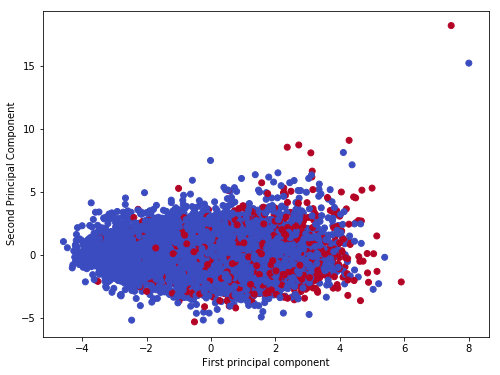

In [17]:
# First will need to scale the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final)
scaled_data = scaler.transform(final)

# Perform the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# Plot the components
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=loan['not.fully.paid'],cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

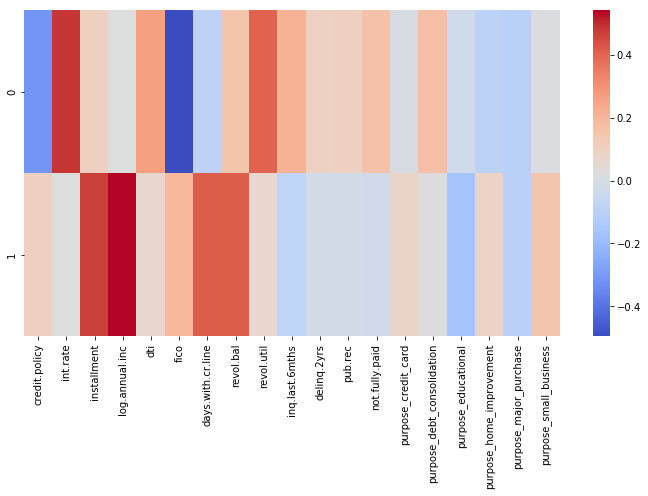

In [18]:
df_comp = pd.DataFrame(pca.components_,columns=final.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='coolwarm',)